In [3]:
import pandas as pd

### Create DataFrames

In [4]:
df = pd.DataFrame(
    {
        "a": [4, 5, 6, 4],
        "b": [7, 8, 9, 10],
        "c": [10, 11, 12, 13],
    },
    index = [1, 2, 3, 4]
)

df

,a,b,c
1,4,7,10
2,5,8,11
3,6,9,12
4,4,10,13


In [5]:
df = pd.DataFrame(
    [
        [4, 7, 10],
        [5, 8, 11],
        [6, 9, 12]
    ],
    index = [1, 2, 3],
    columns = ['a', 'b', 'c']
)

df

,a,b,c
1,4,7,10
2,5,8,11
3,6,9,12


In [6]:
df = pd.DataFrame(
    {
        "a": [4, 5, 6],
        "b": [7, 8, 9],
        "c": [10, 11, 12]
    },
    index = pd.MultiIndex.from_tuples(
        [
            ('d', 1),
            ('d', 2),
            ('e', 2)
        ],
        names = ['n', 'v']
    )
)

df

a  b   c
n v          
d 1  4  7  10
  2  5  8  11
e 2  6  9  12

### Reshaping Data

In [24]:
pd.melt(df)

,variable,value
0,a,4
1,a,5
2,a,6
3,a,4
4,b,7
5,b,8
6,b,9
7,b,10
8,c,10
9,c,11


In [7]:
df.melt()

,variable,value
0,a,4
1,a,5
2,a,6
3,b,7
4,b,8
5,b,9
6,c,10
7,c,11
8,c,12


In [8]:
df.pivot(columns = 'a')

b               c            
a      4    5    6     4     5     6
n v                                 
d 1  7.0  NaN  NaN  10.0   NaN   NaN
  2  NaN  8.0  NaN   NaN  11.0   NaN
e 2  NaN  NaN  9.0   NaN   NaN  12.0

In [9]:
df.pivot(columns = 'a', values = 'b')

a      4    5    6
n v               
d 1  7.0  NaN  NaN
  2  NaN  8.0  NaN
e 2  NaN  NaN  9.0

In [10]:
df.pivot(columns = 'a', values = 'b', index = 'c')

a,4,5,6
c,,,
10,7.0,NaN,NaN
11,NaN,8.0,NaN
12,NaN,NaN,9.0


In [11]:
df

a  b   c
n v          
d 1  4  7  10
  2  5  8  11
e 2  6  9  12

In [12]:
df1 = pd.DataFrame(
    {
        "a": [4, 5, 6],
        "b": [7, 8, 9],
        "c": [10, 11, 12]
    },
    index = [1, 2, 3]
)

df2 = pd.DataFrame(
    {
        "a": [-1, -2, -3, -4],
        "b": [-5, -6, -7, -8],
        "d": [-9, -10, -11, -12]
    },
    index = [1, 6, 7, 8]
)

In [13]:
df1

,a,b,c
1,4,7,10
2,5,8,11
3,6,9,12


In [14]:
df2

,a,b,d
1,-1,-5,-9
6,-2,-6,-10
7,-3,-7,-11
8,-4,-8,-12


In [36]:
pd.concat([df1, df2])

,a,b,c,d
1,4,7,10.0,NaN
2,5,8,11.0,NaN
3,6,9,12.0,NaN
1,-1,-5,NaN,-9.0
6,-2,-6,NaN,-10.0
7,-3,-7,NaN,-11.0
8,-4,-8,NaN,-12.0


In [37]:
pd.concat(
    [df1, df2],
    axis = 1
)

,a,b,c,a,b,d
1,4.0,7.0,10.0,-1.0,-5.0,-9.0
2,5.0,8.0,11.0,NaN,NaN,NaN
3,6.0,9.0,12.0,NaN,NaN,NaN
6,NaN,NaN,NaN,-2.0,-6.0,-10.0
7,NaN,NaN,NaN,-3.0,-7.0,-11.0
8,NaN,NaN,NaN,-4.0,-8.0,-12.0


In [38]:
df2.sort_values('a') # From low to high

,a,b,d
8,-4,-8,-12
7,-3,-7,-11
6,-2,-6,-10
1,-1,-5,-9


In [39]:
df1.rename(columns = {'a': 'A'})

,A,b,c
1,4,7,10
2,5,8,11
3,6,9,12


In [40]:
df2.sort_index()

,a,b,d
1,-1,-5,-9
6,-2,-6,-10
7,-3,-7,-11
8,-4,-8,-12


In [41]:
df2.reset_index()

,index,a,b,d
0,1,-1,-5,-9
1,6,-2,-6,-10
2,7,-3,-7,-11
3,8,-4,-8,-12


In [43]:
df2.reset_index(drop = True)

,a,b,d
0,-1,-5,-9
1,-2,-6,-10
2,-3,-7,-11
3,-4,-8,-12


In [44]:
df2.reset_index().drop(columns = 'index')

,a,b,d
0,-1,-5,-9
1,-2,-6,-10
2,-3,-7,-11
3,-4,-8,-12


### Subset Observations - rows

In [49]:
df1

,a,b,c
1,4,7,10
2,5,8,11
3,6,9,12


In [48]:
df2

,a,b,d
1,-1,-5,-9
6,-2,-6,-10
7,-3,-7,-11
8,-4,-8,-12


In [47]:
df2[df2.a > -3]

,a,b,d
1,-1,-5,-9
6,-2,-6,-10


In [50]:
df2[df2['a'] > -3]

,a,b,d
1,-1,-5,-9
6,-2,-6,-10


In [56]:
df.drop_duplicates()

,a,b,c
1,4,7,10
2,5,8,11
3,6,9,12
4,4,10,13


In [58]:
df2.sample(frac = 0.3)

,a,b,d
1,-1,-5,-9


In [59]:
df2.sample(n = 3)

,a,b,d
7,-3,-7,-11
6,-2,-6,-10
8,-4,-8,-12


In [62]:
df2.nlargest(2, 'b')

,a,b,d
1,-1,-5,-9
6,-2,-6,-10


In [66]:
df2.nsmallest(3, 'd')

,a,b,d
8,-4,-8,-12
7,-3,-7,-11
6,-2,-6,-10


In [67]:
df2.head()

,a,b,d
1,-1,-5,-9
6,-2,-6,-10
7,-3,-7,-11
8,-4,-8,-12


In [68]:
df2.tail(2)

,a,b,d
7,-3,-7,-11
8,-4,-8,-12


### Subset Variables - columns

In [69]:
df2[['a', 'b']]

,a,b
1,-1,-5
6,-2,-6
7,-3,-7
8,-4,-8


In [70]:
df2[['a']]

,a
1,-1
6,-2
7,-3
8,-4


In [71]:
df2['a']

1   -1
6   -2
7   -3
8   -4
Name: a, dtype: int64

In [72]:
df2.a

1   -1
6   -2
7   -3
8   -4
Name: a, dtype: int64

In [73]:
df.filter(regex = 'a') # Select columns whose name matches regular exoression regex

,a
1,4
2,5
3,6
4,4


### Subsets - rows and columns

In [ ]:
# Use df.loc[] amd df.iloc[] to select only rows, only columns or both
# Use df.at[] and df.iat[] to access a single value by row and column

In [17]:
df2

,a,b,d
1,-1,-5,-9
6,-2,-6,-10
7,-3,-7,-11
8,-4,-8,-12


In [16]:
df2.iloc[1:3]

,a,b,d
6,-2,-6,-10
7,-3,-7,-11


In [18]:
df2.iloc[:, [0,1]]

,a,b
1,-1,-5
6,-2,-6
7,-3,-7
8,-4,-8


In [19]:
df2.loc[:, ['a', 'd']]

,a,d
1,-1,-9
6,-2,-10
7,-3,-11
8,-4,-12


In [20]:
df2.loc[:, 'b':'d']

,b,d
1,-5,-9
6,-6,-10
7,-7,-11
8,-8,-12


In [23]:
df2.loc[3:10, ['a', 'd']]

,a,d
6,-2,-10
7,-3,-11
8,-4,-12


In [24]:
df2.loc[df2['a'] > -3, 'b':'d']

,b,d
1,-5,-9
6,-6,-10


In [26]:
df2.iat[1, 2]

np.int64(-10)

In [29]:
df2.at[7, 'd']

np.int64(-11)

### Using query

In [31]:
df2

,a,b,d
1,-1,-5,-9
6,-2,-6,-10
7,-3,-7,-11
8,-4,-8,-12


In [32]:
df2.query(
    'a > -3 and b < -5'
)

,a,b,d
6,-2,-6,-10


### Logic in Python (and pandas)

In [39]:
df2.pivot(columns = 'a')

b                    d                 
a   -4   -3   -2   -1    -4    -3    -2   -1
1  NaN  NaN  NaN -5.0   NaN   NaN   NaN -9.0
6  NaN  NaN -6.0  NaN   NaN   NaN -10.0  NaN
7  NaN -7.0  NaN  NaN   NaN -11.0   NaN  NaN
8 -8.0  NaN  NaN  NaN -12.0   NaN   NaN  NaN

In [38]:
pd.isnull(df2.pivot(columns = 'a'))

b                           d                     
a     -4     -3     -2     -1     -4     -3     -2     -1
1   True   True   True  False   True   True   True  False
6   True   True  False   True   True   True  False   True
7   True  False   True   True   True  False   True   True
8  False   True   True   True  False   True   True   True

In [42]:
df2.pivot(columns = 'a').isnull()

b                           d                     
a     -4     -3     -2     -1     -4     -3     -2     -1
1   True   True   True  False   True   True   True  False
6   True   True  False   True   True   True  False   True
7   True  False   True   True   True  False   True   True
8  False   True   True   True  False   True   True   True

In [43]:
df2.pivot(columns = 'a').isnull().any()

   a 
b  -4    True
   -3    True
   -2    True
   -1    True
d  -4    True
   -3    True
   -2    True
   -1    True
dtype: bool

In [45]:
df2.notnull()

,a,b,d
1,True,True,True
6,True,True,True
7,True,True,True
8,True,True,True


In [46]:
df2.notnull().all()

a    True
b    True
d    True
dtype: bool

In [49]:
df2.a.isin([-1, -2])

1     True
6     True
7    False
8    False
Name: a, dtype: bool

In [50]:
df2

,a,b,d
1,-1,-5,-9
6,-2,-6,-10
7,-3,-7,-11
8,-4,-8,-12


### regex (Regular Expressions) Examples

In [51]:
df2

,a,b,d
1,-1,-5,-9
6,-2,-6,-10
7,-3,-7,-11
8,-4,-8,-12


In [59]:
df2.filter(regex = 'a$')

,a
1,-1
6,-2
7,-3
8,-4


In [62]:
df2.rename(columns = {'a': 'Ab.s'}).filter(regex = 's$')

,Ab.s
1,-1
6,-2
7,-3
8,-4


In [63]:
df2.rename(columns = {'a': 'Ab.s'}).filter(regex = '\.')

,Ab.s
1,-1
6,-2
7,-3
8,-4


In [64]:
df2.rename(columns = {'a': 'Ab.s'}).filter(regex = '^A')

,Ab.s
1,-1
6,-2
7,-3
8,-4


In [69]:
df2.rename(columns = {'a': 'Ab.s'}).filter(regex = '^A[s]$')

""
1
6
7
8


In [73]:
df2.rename(columns = {'a': 'Ab.s'}).filter(regex = '^(?!b$).*')

,Ab.s,d
1,-1,-9
6,-2,-10
7,-3,-11
8,-4,-12


### Summarize Data

In [75]:
df1['a'].value_counts()

a
4    1
5    1
6    1
Name: count, dtype: int64

In [76]:
len(df2)

4

In [78]:
df2.shape

(4, 3)

In [79]:
df2['a'].nunique()

4

In [80]:
df2.describe()

,a,b,d
count,4.000000,4.000000,4.000000
mean,-2.500000,-6.500000,-10.500000
std,1.290994,1.290994,1.290994
min,-4.000000,-8.000000,-12.000000
25%,-3.250000,-7.250000,-11.250000
50%,-2.500000,-6.500000,-10.500000
75%,-1.750000,-5.750000,-9.750000
max,-1.000000,-5.000000,-9.000000


In [81]:
df2.sum()

a   -10
b   -26
d   -42
dtype: int64

In [82]:
df2.count()

a    4
b    4
d    4
dtype: int64

In [83]:
df2.median()

a    -2.5
b    -6.5
d   -10.5
dtype: float64

In [87]:
df2.quantile([0.001, 0.25, 0.5, 0.75])

,a,b,d
0.001,-3.997,-7.997,-11.997
0.250,-3.250,-7.250,-11.250
0.500,-2.500,-6.500,-10.500
0.750,-1.750,-5.750,-9.750


In [88]:
df2

,a,b,d
1,-1,-5,-9
6,-2,-6,-10
7,-3,-7,-11
8,-4,-8,-12


In [89]:
df2.apply(lambda x: x + 1)

,a,b,d
1,0,-4,-8
6,-1,-5,-9
7,-2,-6,-10
8,-3,-7,-11


In [91]:
df2.apply(lambda x: x**2)

,a,b,d
1,1,25,81
6,4,36,100
7,9,49,121
8,16,64,144


In [93]:
df2.min()

a    -4
b    -8
d   -12
dtype: int64

In [94]:
df2.max()

a   -1
b   -5
d   -9
dtype: int64

In [95]:
df2.var()

a    1.666667
b    1.666667
d    1.666667
dtype: float64

In [96]:
df2.std()

a    1.290994
b    1.290994
d    1.290994
dtype: float64

### Handling Missing Data

In [98]:
df2.iloc[1,2] = None

In [100]:
df2

,a,b,d
1,-1,-5,-9.0
6,-2,-6,NaN
7,-3,-7,-11.0
8,-4,-8,-12.0


In [101]:
df2.dropna()

,a,b,d
1,-1,-5,-9.0
7,-3,-7,-11.0
8,-4,-8,-12.0


In [102]:
df2.fillna(0)

,a,b,d
1,-1,-5,-9.0
6,-2,-6,0.0
7,-3,-7,-11.0
8,-4,-8,-12.0


### Make New Columns

In [103]:
df2

,a,b,d
1,-1,-5,-9.0
6,-2,-6,NaN
7,-3,-7,-11.0
8,-4,-8,-12.0


In [109]:
df2 = df2.assign(new_col = lambda x: x.a * x.b)

In [110]:
df2

,a,b,d,new_col
1,-1,-5,-9.0,5
6,-2,-6,NaN,12
7,-3,-7,-11.0,21
8,-4,-8,-12.0,32


In [111]:
df2['n'] = df2.d * df2.a

In [112]:
df2

,a,b,d,new_col,n
1,-1,-5,-9.0,5,9.0
6,-2,-6,NaN,12,NaN
7,-3,-7,-11.0,21,33.0
8,-4,-8,-12.0,32,48.0


In [121]:
pd.qcut(df2.d, 4)

1       (-10.0, -9.0]
6                 NaN
7      (-11.5, -11.0]
8    (-12.001, -11.5]
Name: d, dtype: category
Categories (4, interval[float64, right]): [(-12.001, -11.5] < (-11.5, -11.0] < (-11.0, -10.0] < (-10.0, -9.0]]

In [123]:
pd.qcut(df2.new_col, 4)

1    (4.999, 10.25]
6     (10.25, 16.5]
7     (16.5, 23.75]
8     (23.75, 32.0]
Name: new_col, dtype: category
Categories (4, interval[float64, right]): [(4.999, 10.25] < (10.25, 16.5] < (16.5, 23.75] < (23.75, 32.0]]

In [124]:
pd.qcut(df2.d, 4, labels=False)

1    3.0
6    NaN
7    1.0
8    0.0
Name: d, dtype: float64

In [125]:
df2.max() # For columns

a          -1.0
b          -5.0
d          -9.0
new_col    32.0
n          48.0
dtype: float64

In [126]:
df2.max(axis=1) # For rows

1     9.0
6    12.0
7    33.0
8    48.0
dtype: float64

In [127]:
df2

,a,b,d,new_col,n
1,-1,-5,-9.0,5,9.0
6,-2,-6,NaN,12,NaN
7,-3,-7,-11.0,21,33.0
8,-4,-8,-12.0,32,48.0


In [128]:
df2.abs()

,a,b,d,new_col,n
1,1,5,9.0,5,9.0
6,2,6,NaN,12,NaN
7,3,7,11.0,21,33.0
8,4,8,12.0,32,48.0


In [129]:
df2.clip(lower=-5, upper=0)

,a,b,d,new_col,n
1,-1,-5,-5.0,0,0.0
6,-2,-5,NaN,0,NaN
7,-3,-5,-5.0,0,0.0
8,-4,-5,-5.0,0,0.0


### Group Data

In [141]:
df3 = pd.DataFrame(
    [[-1, 3, 6, -3, 99]],
    columns = ['a', 'b', 'c', 'new_col', 'n']
)

df2 = pd.concat([df2, df3])

In [143]:
df2

,a,b,d,new_col,n,c
1,-1.0,-5.0,-9.0,5.0,9.0,NaN
6,-2.0,-6.0,NaN,12.0,NaN,NaN
7,-3.0,-7.0,-11.0,21.0,33.0,NaN
8,-4.0,-8.0,-12.0,32.0,48.0,NaN
0,NaN,NaN,NaN,NaN,NaN,NaN
0,-1.0,3.0,NaN,-3.0,99.0,NaN
0,-1.0,3.0,NaN,-3.0,99.0,6.0


In [145]:
df2.groupby(by='a')

In [148]:
df2.groupby(by='a').sum()

,b,d,new_col,n,c
a,,,,,
-4.0,-8.0,-12.0,32.0,48.0,0.0
-3.0,-7.0,-11.0,21.0,33.0,0.0
-2.0,-6.0,0.0,12.0,0.0,0.0
-1.0,1.0,-9.0,-1.0,207.0,6.0


In [149]:
df2.groupby(by='a').size()

a
-4.0    1
-3.0    1
-2.0    1
-1.0    3
dtype: int64

In [151]:
df2.groupby(by='a').agg(['sum', 'mean', 'std', 'min', 'size'])

b                                   d                       ...  \
      sum      mean       std  min size   sum  mean std   min size  ...   
a                                                                   ...   
-4.0 -8.0 -8.000000       NaN -8.0    1 -12.0 -12.0 NaN -12.0    1  ...   
-3.0 -7.0 -7.000000       NaN -7.0    1 -11.0 -11.0 NaN -11.0    1  ...   
-2.0 -6.0 -6.000000       NaN -6.0    1   0.0   NaN NaN   NaN    1  ...   
-1.0  1.0  0.333333  4.618802 -5.0    3  -9.0  -9.0 NaN  -9.0    3  ...   

          n                                c                     
        sum  mean        std   min size  sum mean std  min size  
a                                                                
-4.0   48.0  48.0        NaN  48.0    1  0.0  NaN NaN  NaN    1  
-3.0   33.0  33.0        NaN  33.0    1  0.0  NaN NaN  NaN    1  
-2.0    0.0   NaN        NaN   NaN    1  0.0  NaN NaN  NaN    1  
-1.0  207.0  69.0  51.961524   9.0    3  6.0  6.0 NaN  6.0    3  

[4 rows x 25 columns]

In [152]:
df2.groupby(by='a').shift(1)

,b,d,new_col,n,c
1,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN
0,NaN,NaN,NaN,NaN,NaN
0,-5.0,-9.0,5.0,9.0,NaN
0,3.0,NaN,-3.0,99.0,NaN


In [154]:
df2

,a,b,d,new_col,n,c
1,-1.0,-5.0,-9.0,5.0,9.0,NaN
6,-2.0,-6.0,NaN,12.0,NaN,NaN
7,-3.0,-7.0,-11.0,21.0,33.0,NaN
8,-4.0,-8.0,-12.0,32.0,48.0,NaN
0,NaN,NaN,NaN,NaN,NaN,NaN
0,-1.0,3.0,NaN,-3.0,99.0,NaN
0,-1.0,3.0,NaN,-3.0,99.0,6.0


In [155]:
df2.groupby(by='a').rank(method='dense')

,b,d,new_col,n,c
1,1.0,1.0,2.0,1.0,NaN
6,1.0,NaN,1.0,NaN,NaN
7,1.0,1.0,1.0,1.0,NaN
8,1.0,1.0,1.0,1.0,NaN
0,NaN,NaN,NaN,NaN,NaN
0,2.0,NaN,1.0,2.0,NaN
0,2.0,NaN,1.0,2.0,1.0


In [156]:
df2.groupby(by='a').rank(pct=True)

,b,d,new_col,n,c
1,0.333333,1.0,1.0,0.333333,NaN
6,1.000000,NaN,1.0,NaN,NaN
7,1.000000,1.0,1.0,1.000000,NaN
8,1.000000,1.0,1.0,1.000000,NaN
0,NaN,NaN,NaN,NaN,NaN
0,0.833333,NaN,0.5,0.833333,NaN
0,0.833333,NaN,0.5,0.833333,1.0


In [157]:
df2.groupby('a').rank(method='first')

,b,d,new_col,n,c
1,1.0,1.0,3.0,1.0,NaN
6,1.0,NaN,1.0,NaN,NaN
7,1.0,1.0,1.0,1.0,NaN
8,1.0,1.0,1.0,1.0,NaN
0,NaN,NaN,NaN,NaN,NaN
0,2.0,NaN,1.0,2.0,NaN
0,3.0,NaN,2.0,3.0,1.0


In [158]:
df2.groupby('a').cumsum()

,b,d,new_col,n,c
1,-5.0,-9.0,5.0,9.0,NaN
6,-6.0,NaN,12.0,NaN,NaN
7,-7.0,-11.0,21.0,33.0,NaN
8,-8.0,-12.0,32.0,48.0,NaN
0,NaN,NaN,NaN,NaN,NaN
0,-2.0,NaN,2.0,108.0,NaN
0,1.0,NaN,-1.0,207.0,6.0


In [159]:
df2.groupby('a').cummax()

,b,d,new_col,n,c
1,-5.0,-9.0,5.0,9.0,NaN
6,-6.0,NaN,12.0,NaN,NaN
7,-7.0,-11.0,21.0,33.0,NaN
8,-8.0,-12.0,32.0,48.0,NaN
0,NaN,NaN,NaN,NaN,NaN
0,3.0,NaN,5.0,99.0,NaN
0,3.0,NaN,5.0,99.0,6.0


In [160]:
df2.groupby('a').cumprod()

,b,d,new_col,n,c
1,-5.0,-9.0,5.0,9.0,NaN
6,-6.0,NaN,12.0,NaN,NaN
7,-7.0,-11.0,21.0,33.0,NaN
8,-8.0,-12.0,32.0,48.0,NaN
0,NaN,NaN,NaN,NaN,NaN
0,-15.0,NaN,-15.0,891.0,NaN
0,-45.0,NaN,45.0,88209.0,6.0


### Windows

In [161]:
df2.expanding()

Expanding [min_periods=1,axis=0,method=single]

In [162]:
df2.expanding().sum()

,a,b,d,new_col,n,c
1,-1.0,-5.0,-9.0,5.0,9.0,NaN
6,-3.0,-11.0,-9.0,17.0,9.0,NaN
7,-6.0,-18.0,-20.0,38.0,42.0,NaN
8,-10.0,-26.0,-32.0,70.0,90.0,NaN
0,-10.0,-26.0,-32.0,70.0,90.0,NaN
0,-11.0,-23.0,-32.0,67.0,189.0,NaN
0,-12.0,-20.0,-32.0,64.0,288.0,6.0


In [165]:
df2

,a,b,d,new_col,n,c
1,-1.0,-5.0,-9.0,5.0,9.0,NaN
6,-2.0,-6.0,NaN,12.0,NaN,NaN
7,-3.0,-7.0,-11.0,21.0,33.0,NaN
8,-4.0,-8.0,-12.0,32.0,48.0,NaN
0,NaN,NaN,NaN,NaN,NaN,NaN
0,-1.0,3.0,NaN,-3.0,99.0,NaN
0,-1.0,3.0,NaN,-3.0,99.0,6.0


In [168]:
df2[['a','b']].expanding().mean()

,a,b
1,-1.0,-5.000000
6,-1.5,-5.500000
7,-2.0,-6.000000
8,-2.5,-6.500000
0,-2.5,-6.500000
0,-2.2,-4.600000
0,-2.0,-3.333333


In [171]:
df2.rolling(2).sum()

,a,b,d,new_col,n,c
1,NaN,NaN,NaN,NaN,NaN,NaN
6,-3.0,-11.0,NaN,17.0,NaN,NaN
7,-5.0,-13.0,NaN,33.0,NaN,NaN
8,-7.0,-15.0,-23.0,53.0,81.0,NaN
0,NaN,NaN,NaN,NaN,NaN,NaN
0,NaN,NaN,NaN,NaN,NaN,NaN
0,-2.0,6.0,NaN,-6.0,198.0,NaN


In [172]:
df2

,a,b,d,new_col,n,c
1,-1.0,-5.0,-9.0,5.0,9.0,NaN
6,-2.0,-6.0,NaN,12.0,NaN,NaN
7,-3.0,-7.0,-11.0,21.0,33.0,NaN
8,-4.0,-8.0,-12.0,32.0,48.0,NaN
0,NaN,NaN,NaN,NaN,NaN,NaN
0,-1.0,3.0,NaN,-3.0,99.0,NaN
0,-1.0,3.0,NaN,-3.0,99.0,6.0


### Plotting

<Axes: ylabel='Frequency'>

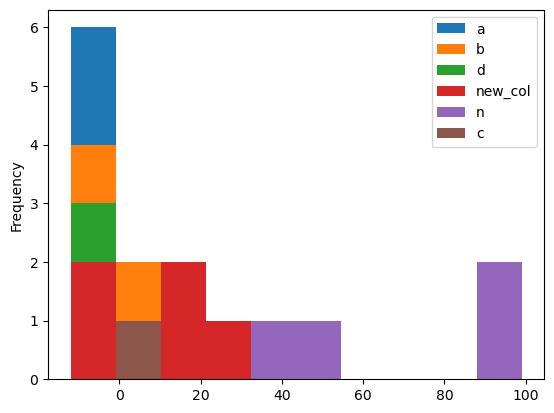

In [175]:
df2.plot.hist()

<Axes: xlabel='a', ylabel='b'>

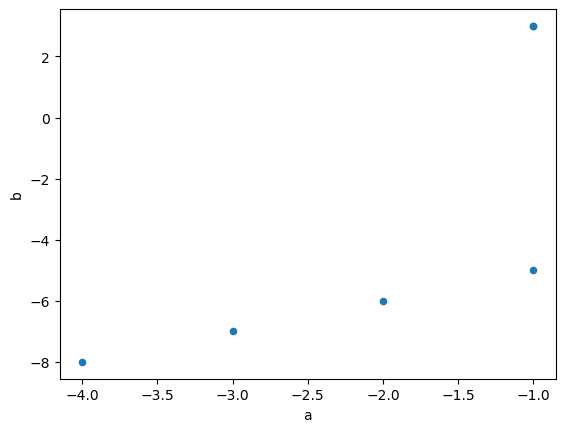

In [176]:
df2.plot.scatter(x = 'a', y = 'b')

### Combine Data Sets

In [177]:
adf = pd.DataFrame(
    {
        'x1': ['A', 'B', 'C'],
        'x2': [1, 2, 3]
    }
)

adf

,x1,x2
0,A,1
1,B,2
2,C,3


In [178]:
bdf = pd.DataFrame(
    {
        'x1': ['A', 'B', 'D'],
        'x3': [True, False, True]
    }
)
bdf

,x1,x3
0,A,True
1,B,False
2,D,True


In [179]:
# Join matching rows from bdf to adf
pd.merge(adf, bdf,
         how = 'left', on = 'x1')

,x1,x2,x3
0,A,1,True
1,B,2,False
2,C,3,NaN


In [180]:
# Join matching rows from adf to bdf
pd.merge(adf, bdf,
         how = 'right', on = 'x1')

,x1,x2,x3
0,A,1.0,True
1,B,2.0,False
2,D,NaN,True


In [181]:
# Join data. Retain only rows in both sets
pd.merge(adf, bdf,
         how = 'inner', on = 'x1')

,x1,x2,x3
0,A,1,True
1,B,2,False


In [184]:
# Join data. Retain all values, all rows
pd.merge(adf, bdf,
         how = 'outer')

,x1,x2,x3
0,A,1.0,True
1,B,2.0,False
2,C,3.0,NaN
3,D,NaN,True


In [188]:
# All rows in adf that have a match in bdf
adf[adf.x1.isin(bdf.x1)]

,x1,x2
0,A,1
1,B,2


In [189]:
# All rows in adf that do not have a match in bdf
adf[~adf.x1.isin(bdf.x1)]

,x1,x2
2,C,3


In [190]:
# intersection
pd.merge(adf, bdf)

,x1,x2,x3
0,A,1,True
1,B,2,False


In [191]:
# union
pd.merge(adf, bdf, how='outer')

,x1,x2,x3
0,A,1.0,True
1,B,2.0,False
2,C,3.0,NaN
3,D,NaN,True


In [192]:
# set minus (adf minus bdf)
pd.merge(adf, bdf, how='outer',
         indicator=True)

,x1,x2,x3,_merge
0,A,1.0,True,both
1,B,2.0,False,both
2,C,3.0,NaN,left_only
3,D,NaN,True,right_only


In [194]:
pd.merge(adf, bdf, how='outer',
         indicator=True).query('_merge == "left_only"')

,x1,x2,x3,_merge
2,C,3.0,NaN,left_only


In [198]:
pd.merge(adf, bdf, how='outer',
         indicator=True).query('_merge == "left_only"').drop(columns='_merge')

,x1,x2,x3
2,C,3.0,NaN


In [200]:
x = [10, 20, 30, 40]
print(x[(len(x)-1) : None : -1])

[40, 30, 20, 10]


In [203]:
x == [10,20,300,40]

False

In [204]:
x + x

[10, 20, 30, 40, 10, 20, 30, 40]

In [206]:
(1,2,3) == (1,20,3)

False

In [207]:
from collections import deque

elements = [1,12,3,4]
d = deque(elements)
d.append(2)

In [208]:
d

deque([1, 12, 3, 4, 2])

In [209]:
elements

[1, 12, 3, 4]